In [1]:
#::GMG::Previo: matrices
m<-matrix(c(2,8,5,4,6,2),nrow=3,ncol=2,byrow=TRUE)

In [2]:
m

2,8
5,4
6,2


In [3]:
str(m)

 num [1:3, 1:2] 2 5 6 8 4 2


In [6]:
m[1,2]

[1] 8

In [7]:
m[,1]

[1] 2 5 6

In [8]:
m[2,]

[1] 5 4

In [9]:
m[2,1:2]

[1] 5 4

In [10]:
m[1:2,1]

[1] 2 5

In [11]:
a<-c(2,4,5,1,2,10)
b<-c(9,3,4,1,5,2)

In [12]:
ab <- c(a,b)

In [13]:
ab

[1]  2  4  5  1  2 10  9  3  4  1  5  2

In [14]:
c <- rbind(a,b)
c

a,2,4,5,1,2,10
b,9,3,4,1,5,2


In [17]:
dim(c)

[1] 2 6

In [15]:
d <- cbind(a,b)
d

a,b
2,9
4,3
5,4
1,1
2,5
10,2


In [21]:
t(d)

a,2,4,5,1,2,10
b,9,3,4,1,5,2


In [18]:
dim(d)

[1] 6 2

In [16]:
c%*%d

,a,b
a,150,81
b,81,136


In [20]:
c*t(d)

a,4,16,25,1,4,100
b,81,9,16,1,25,4


In [22]:
colores<-c("Azul","Azul","Rojo","Azul","Rojo","Azul")
table(colores)

colores
Azul Rojo 
   4    2 

In [23]:
colores<-c("Azul","Azul","Rojo","Azul","Rojo","Azul")
defectos <-c("No", "Si", "Si", "Si", "No", "Si")
table(defectos,colores)

        colores
defectos Azul Rojo
      No    1    1
      Si    3    1

In [24]:
Altura<-c(175,192,168,155,164,179)
Peso<-c(77,100,78,60,72,88)
Sexo<-c("M","V","V","M","M","V")

datos<-data.frame(Altura,Peso,Sexo)
datos

Altura,Peso,Sexo
175,77,M
192,100,V
168,78,V
155,60,M
164,72,M
179,88,V


In [28]:
as.numeric(rownames(datos))

[1] 1 2 3 4 5 6

In [29]:
colnames(datos)

[1] "Altura" "Peso"   "Sexo"

In [34]:
with(datos, Altura<170)
with(datos, Altura[Altura<170])

[1] FALSE FALSE  TRUE  TRUE  TRUE FALSE

[1] 168 155 164

In [35]:
headers = read.csv(file = url(
  "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv"
                   ), 
                   skip = 0, 
                   header = FALSE, 
                   nrows = 1, 
                   as.is = TRUE,
                   strip.white = TRUE)

In [36]:
noaa.sea.ice <- read.csv(
  file = url(
    "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/daily/data/N_seaice_extent_daily_v3.0.csv"
  ),
  skip = 2, 
  header = FALSE)

In [37]:
colnames(noaa.sea.ice)= headers
str(noaa.sea.ice)

'data.frame':	13017 obs. of  6 variables:
 $ Year       : int  1978 1978 1978 1978 1978 1978 1978 1978 1978 1978 ...
 $ Month      : int  10 10 10 11 11 11 11 11 11 11 ...
 $ Day        : int  26 28 30 1 3 5 7 9 11 13 ...
 $ Extent     : num  10.2 10.4 10.6 10.7 10.8 ...
 $ Missing    : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Source Data: Factor w/ 13017 levels " ['ftp://sidads.colorado.edu/pub/DATASETS/nsidc0051_gsfc_nasateam_seaice/final-gsfc/north/daily/1978/nt_1978102"| __truncated__,..: 1 2 3 4 5 6 7 8 9 10 ...


In [38]:
ext.median <- aggregate(Extent~Month, data=noaa.sea.ice, median)
ext.median

Month,Extent
1,14.2185
2,15.1730
3,15.2830
4,14.5130
5,13.0920
6,11.6300
7,9.1100
8,6.8725
9,6.1035
10,8.1490


In [64]:
str(ext.median)

'data.frame':	12 obs. of  2 variables:
 $ Month : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Extent: num  14.2 15.2 15.3 14.5 13.1 ...


In [67]:
# https://www.statmethods.net/stats/withby.html
ext.median.alt <- by(noaa.sea.ice$Extent, noaa.sea.ice$Month, function(x) median(x))

In [68]:
str(ext.median.alt)

 by [1:12(1d)] 14.2 15.2 15.3 14.5 13.1 ...
 - attr(*, "dimnames")=List of 1
  ..$ noaa.sea.ice$Month: chr [1:12] "1" "2" "3" "4" ...
 - attr(*, "call")= language by.default(data = noaa.sea.ice$Extent, INDICES = noaa.sea.ice$Month, FUN = function(x) median(x))


In [55]:
dim(noaa.sea.ice)

[1] 13017     6

In [65]:
# https://stackoverflow.com/questions/18503177/r-apply-function-on-specific-dataframe-columns
# https://websites.pmc.ucsc.edu/~mclapham/Rtips/apply_sapply.htm
ext.median.alt.2 <- sapply(split(noaa.sea.ice$Extent,noaa.sea.ice$Month),median)
ext.median.alt.2

1       2       3       4       5       6       7       8       9      10 
14.2185 15.1730 15.2830 14.5130 13.0920 11.6300  9.1100  6.8725  6.1035  8.1490 
     11      12 
10.4480 12.6810

In [66]:
str(ext.median.alt.2)

 Named num [1:12] 14.2 15.2 15.3 14.5 13.1 ...
 - attr(*, "names")= chr [1:12] "1" "2" "3" "4" ...


In [73]:
as.data.frame(ext.median.alt.2)

ext.median.alt.2
14.2185
15.1730
15.2830
14.5130
13.0920
11.6300
9.1100
6.8725
6.1035
8.1490


In [74]:
# https://datacarpentry.org/R-genomics/04-dplyr.html (?)

In [75]:
x<-c(1,6,9,2,NA)
is.na(x)
!is.na(x)
y<-x[!is.na(x)]

[1] FALSE FALSE FALSE FALSE  TRUE

[1]  TRUE  TRUE  TRUE  TRUE FALSE

In [76]:
x<-c( 1.11,  1.71, -0.98, -0.83, -0.13,  0.61)

In [77]:
sum(x)

[1] 1.49

In [78]:
paste(max(x), min(x))

[1] "1.71 -0.98"

In [79]:
length(x)

[1] 6

In [80]:
sort(x)

[1] -0.98 -0.83 -0.13  0.61  1.11  1.71

In [81]:
paste(mean(x), median(x))

[1] "0.248333333333333 0.24"

In [82]:
which(x==1.71)
which(x!=1.71)
which(x>0.2)
which(x>0.2 | x==-0.98)
which(x>0.2 & x<1.5)

[1] 2

[1] 1 3 4 5 6

[1] 1 2 6

[1] 1 2 3 6

[1] 1 6

In [83]:
paste(var(x), sd(x))

[1] "1.16489666666667 1.07930378794233"

In [85]:
IQR(x)

[1] 1.64

In [86]:
quantile(x)

0%    25%    50%    75%   100% 
-0.980 -0.655  0.240  0.985  1.710

In [87]:
paste(median(x),quantile(x,0.5))

[1] "0.24 0.24"

In [88]:
quantile(x,0.25)

25% 
-0.655

In [89]:
quantile(x,0)

0% 
-0.98

In [90]:
quantile(x,0.95)

95% 
1.56

In [91]:
suma <- function(a, b){
 a+b 
}
suma(2,5)

[1] 7

In [92]:
datos<-c("A","A","A","A","B","B","B","AB","0","0","0","0","0","0")

In [93]:
str(datos)

 chr [1:14] "A" "A" "A" "A" "B" "B" "B" "AB" "0" "0" "0" "0" "0" "0"


In [94]:
typeof(datos)

[1] "character"

In [95]:
table(datos)

datos
 0  A AB  B 
 6  4  1  3 

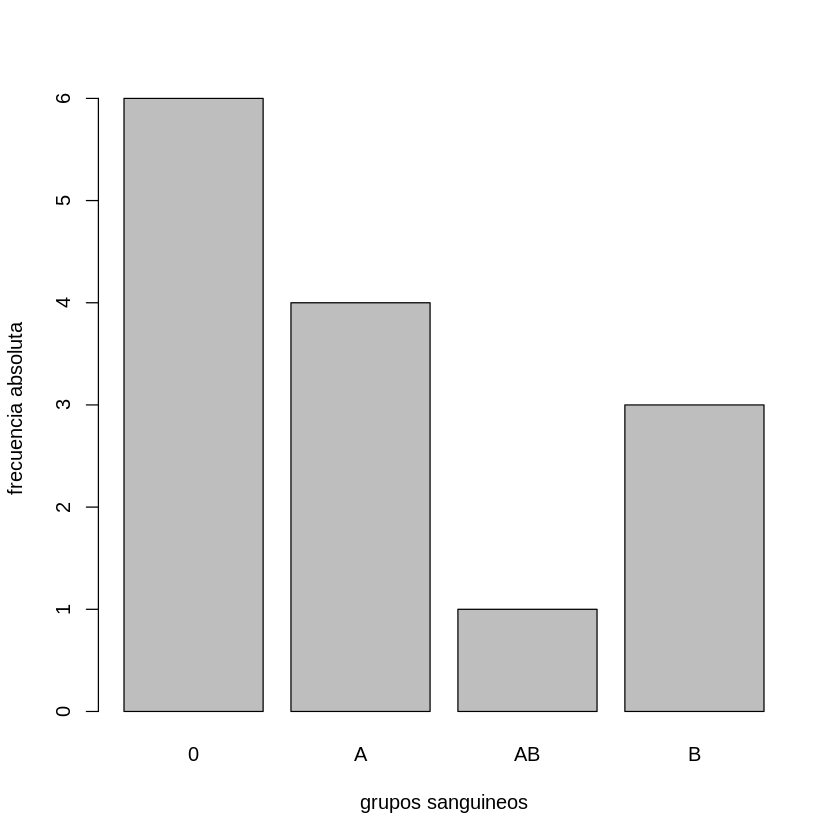

In [96]:
#Diagrama de barras   (Datos cuantitativos discretos y datos cualitativos)
barplot(table(datos),
        xlab="grupos sanguineos", 
        ylab="frecuencia absoluta")

In [97]:
valores_variable<-c("A","B","AB","0")
frecuencia_absoluta<-c(40,15,5,45)

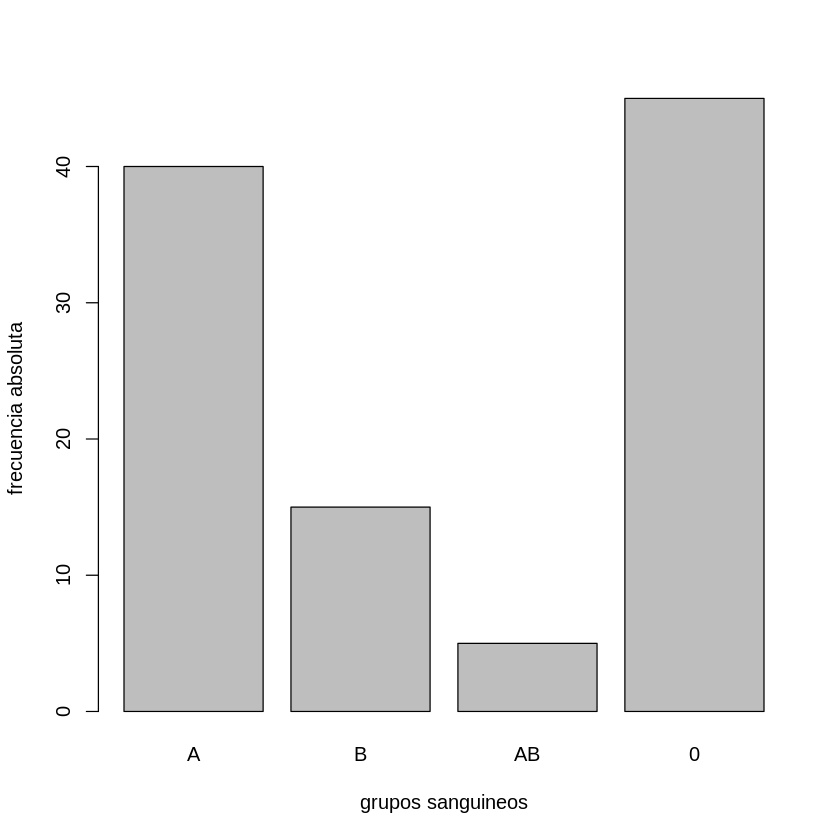

In [99]:
barplot(height = frecuencia_absoluta,
        names.arg=valores_variable,
        xlab="grupos sanguineos", 
        ylab="frecuencia absoluta")

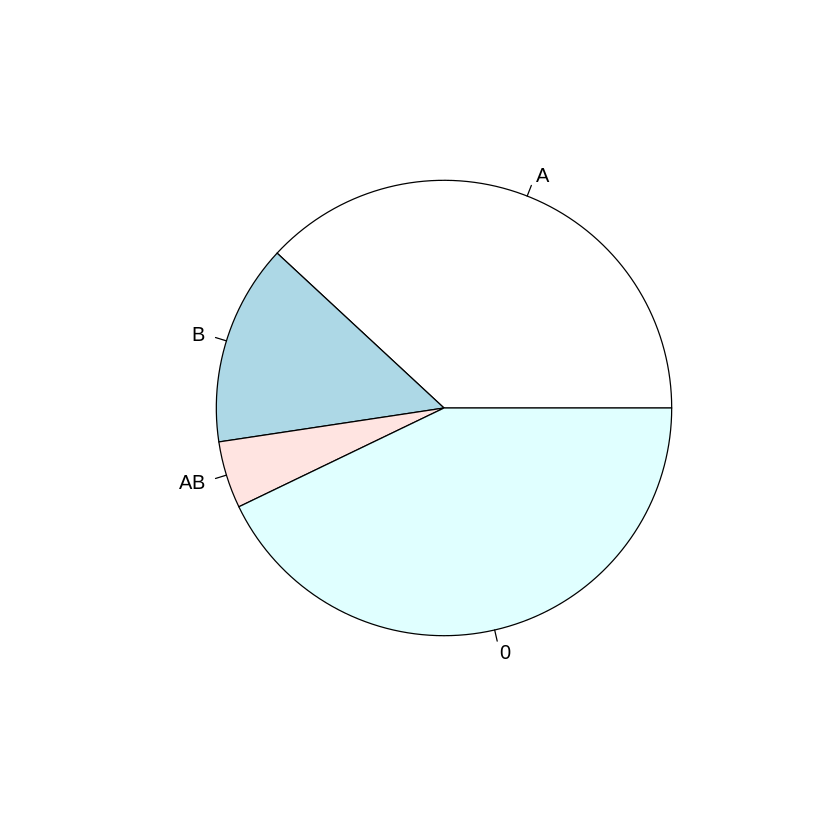

In [100]:
#Diagrama de sectores (Datos cuantitativos discretos y datos cualitativos)
pie(frecuencia_absoluta,labels=valores_variable)

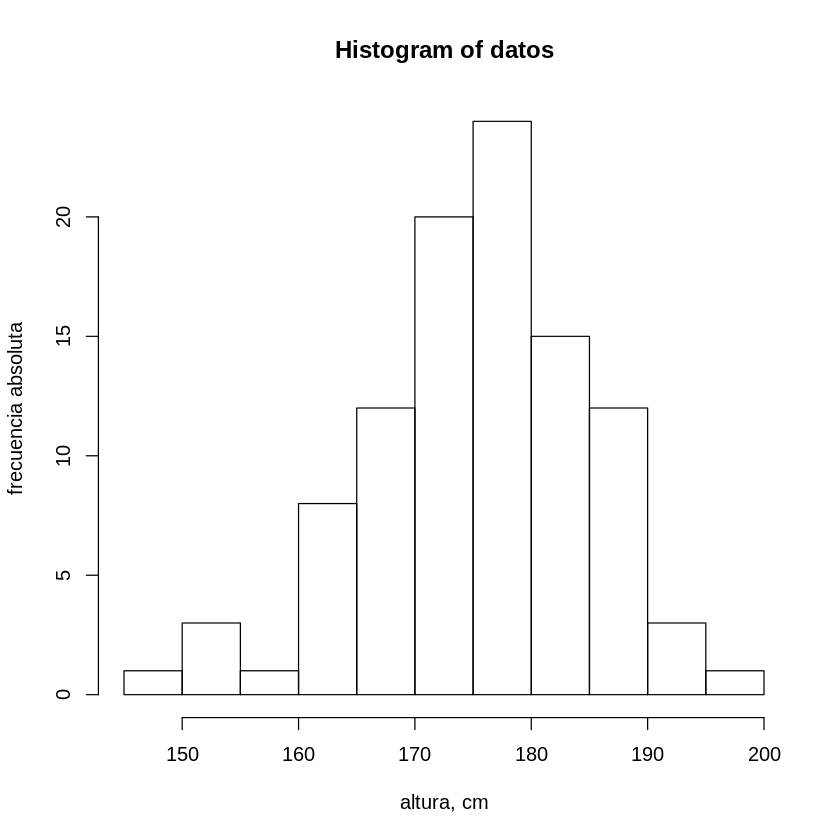

In [101]:
#Histograma  (Datos cuantitativos continuos)
datos<-rnorm(100,175,10)
hist(datos,xlab="altura, cm",ylab="frecuencia absoluta")

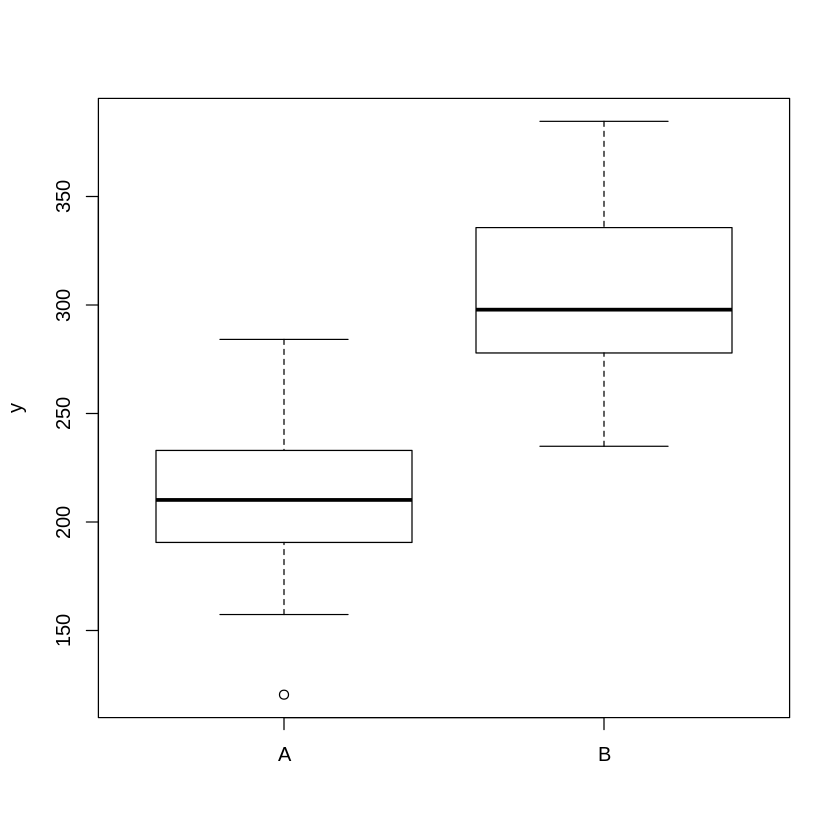

In [102]:
#Diagrama de cajas  (Comparación de datos continuos)
A<-c(120.43, 224.19, 203.90, 157.36, 216.45, 196.84, 232.99, 239.55, 190.58, 284.15)
B<-c(290.15, 254.39, 280.03, 277.90, 315.90, 234.90, 305.56, 374.15, 384.64, 335.67)
boxplot(A,B,ylab="y",names=c("A","B"))

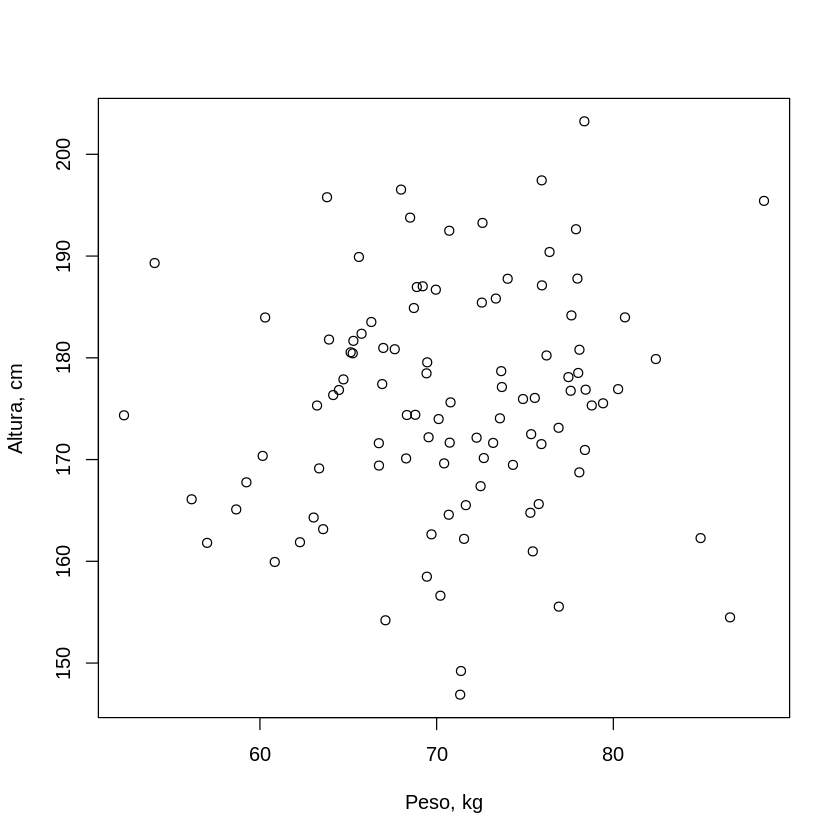

In [103]:
#DIAGRAMA DE DISPERSION  (Relacionar dos variables cuantitativas)
datos_Altura<-rnorm(100,175,10)
datos_Peso<-rnorm(100,70,7)

plot(datos_Peso,datos_Altura,xlab="Peso, kg", ylab="Altura, cm")

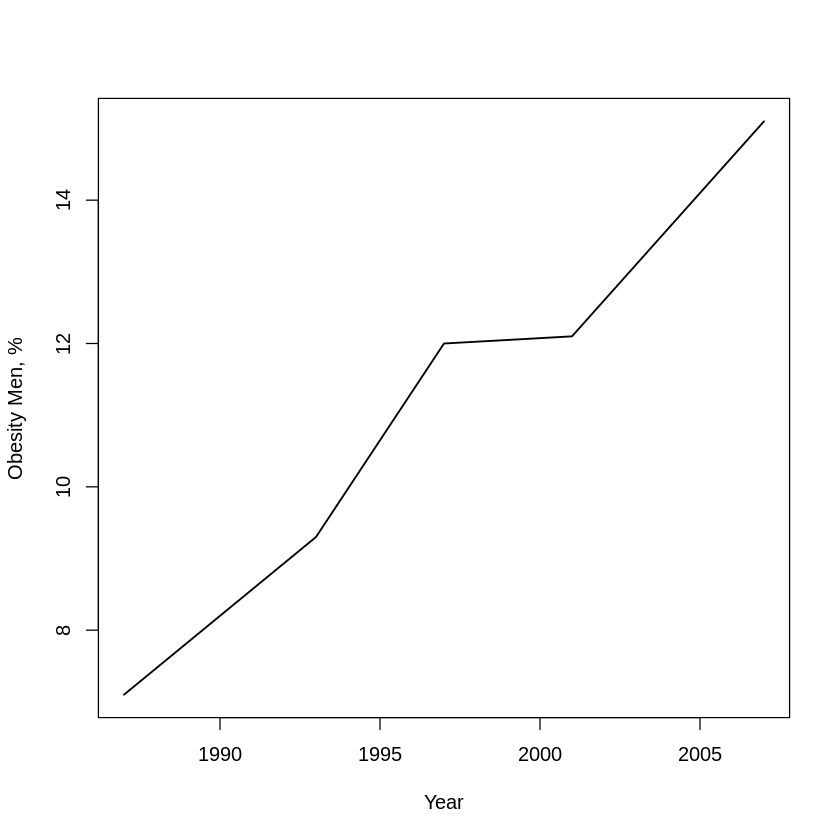

In [104]:
#DIAGRAMA DE LINEAS  (Relacionar dos variables cuantitativas)
year <- c(1987, 1993, 1997, 2001, 2007)
y_M <- c(7.1, 9.3, 12.0, 12.1, 15.1)

plot(year,y_M,xlab="Year",ylab="Obesity Men, %", type="l",lwd=1.5)

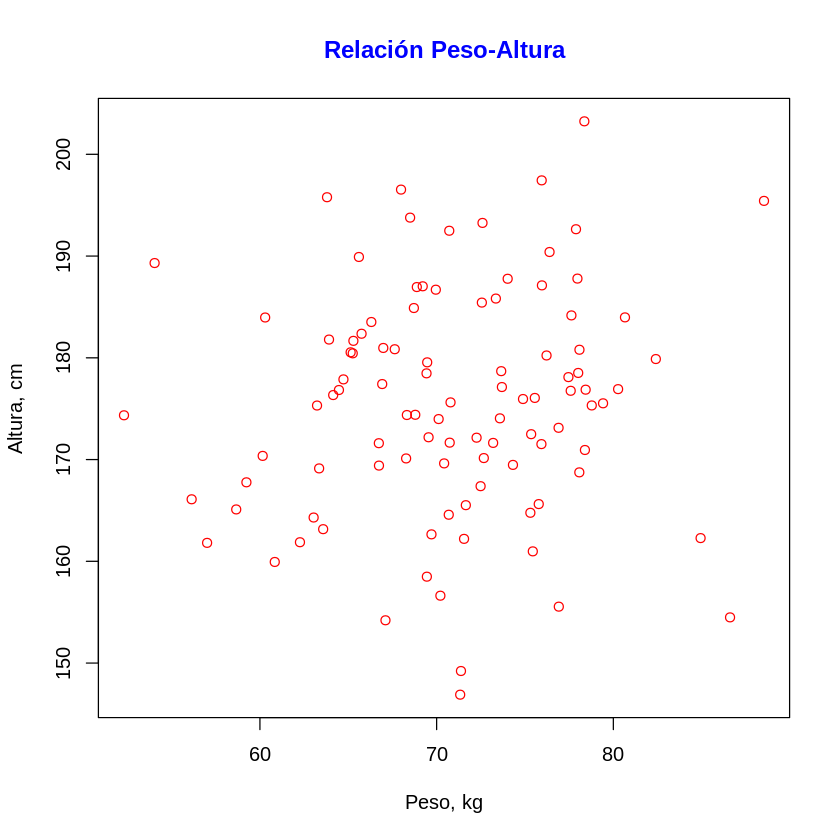

In [105]:
plot(datos_Peso,
     datos_Altura,
     xlab="Peso, kg", ylab="Altura, cm",
     col = 'Red',
     main="Relación Peso-Altura",
     col.main='Blue')

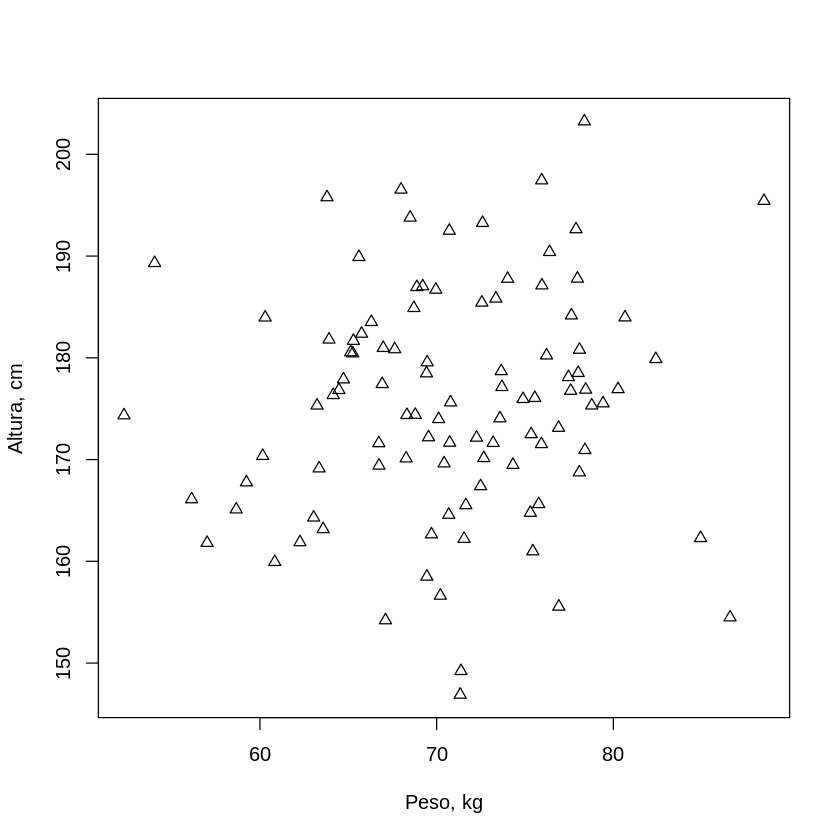

In [106]:
plot(datos_Peso,datos_Altura,xlab="Peso, kg", ylab="Altura, cm",pch=2)

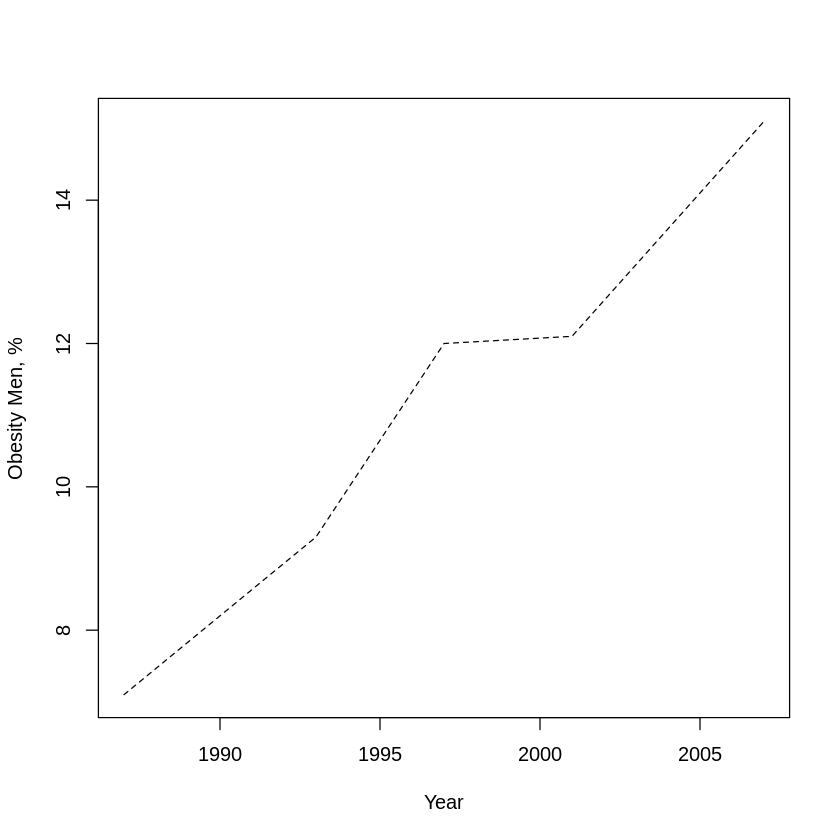

In [107]:
year <- c(1987, 1993, 1997, 2001, 2007)
y_M <- c(7.1, 9.3, 12.0, 12.1, 15.1)
y_W<- c(8.9, 9.6, 13.1, 13.6, 14.3)

plot(year,y_M,xlab="Year",ylab="Obesity Men, %",type="l",lty=2)

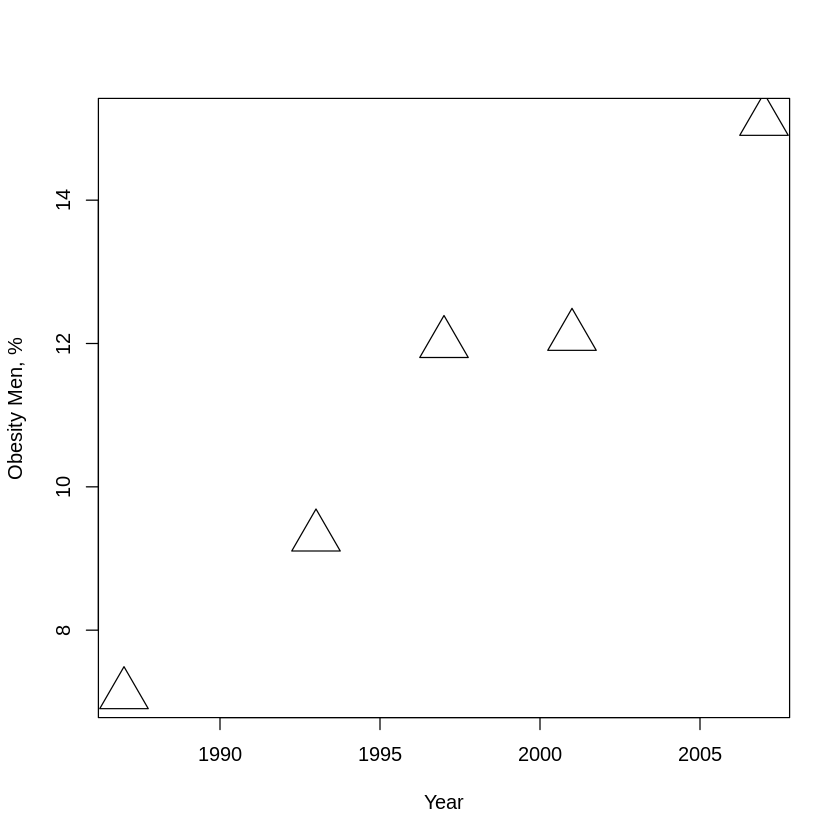

In [108]:
plot(year,y_M,xlab="Year",ylab="Obesity Men, %",pch=2,cex=4)

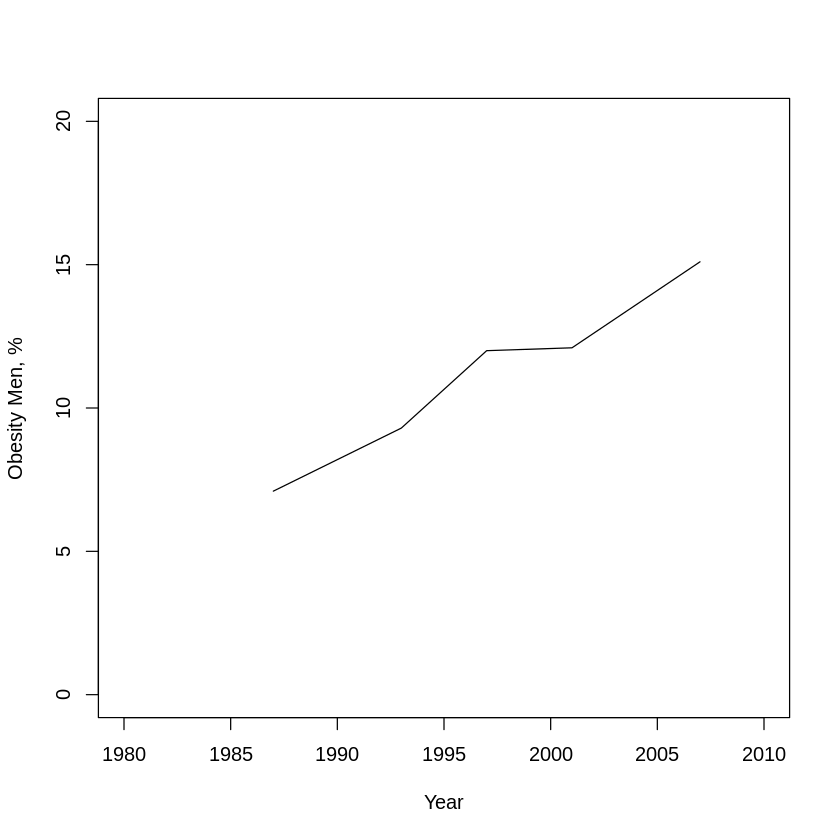

In [110]:
plot(year,
     y_M,
     xlab="Year",ylab="Obesity Men, %",
     type="l",
     xlim=c(1980, 2010), ylim=c(0,20)
    )

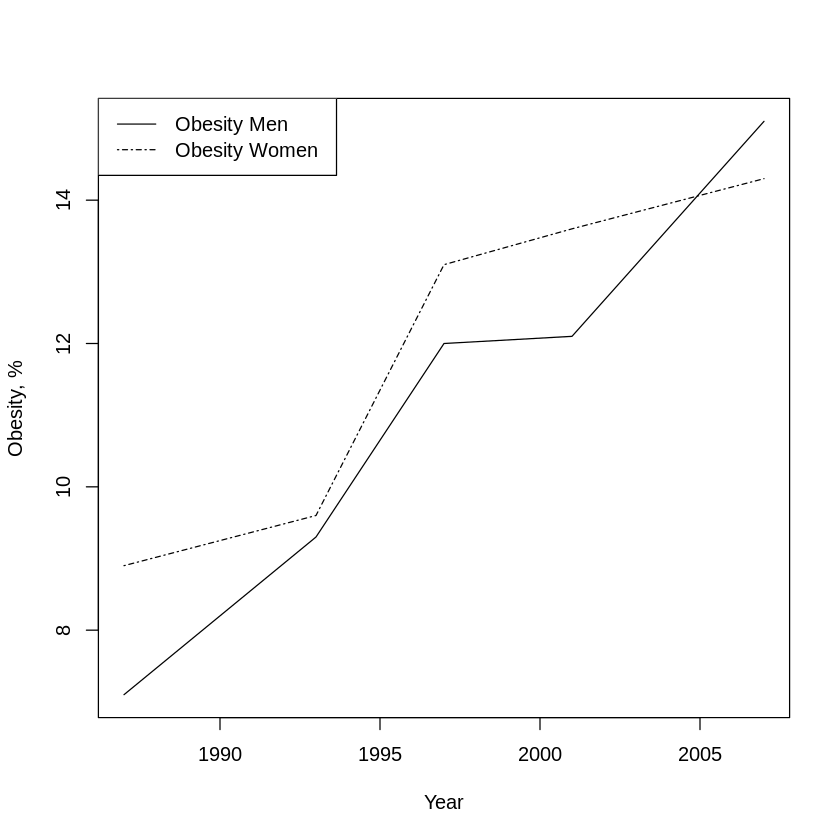

In [113]:
plot(year,y_M,xlab="Year",ylab="Obesity, %",type="l")
lines(year,y_W,xlab="Year",ylab="Obesity, %",lty=4)
legend("topleft",lty=c(1,4),c("Obesity Men","Obesity Women"))

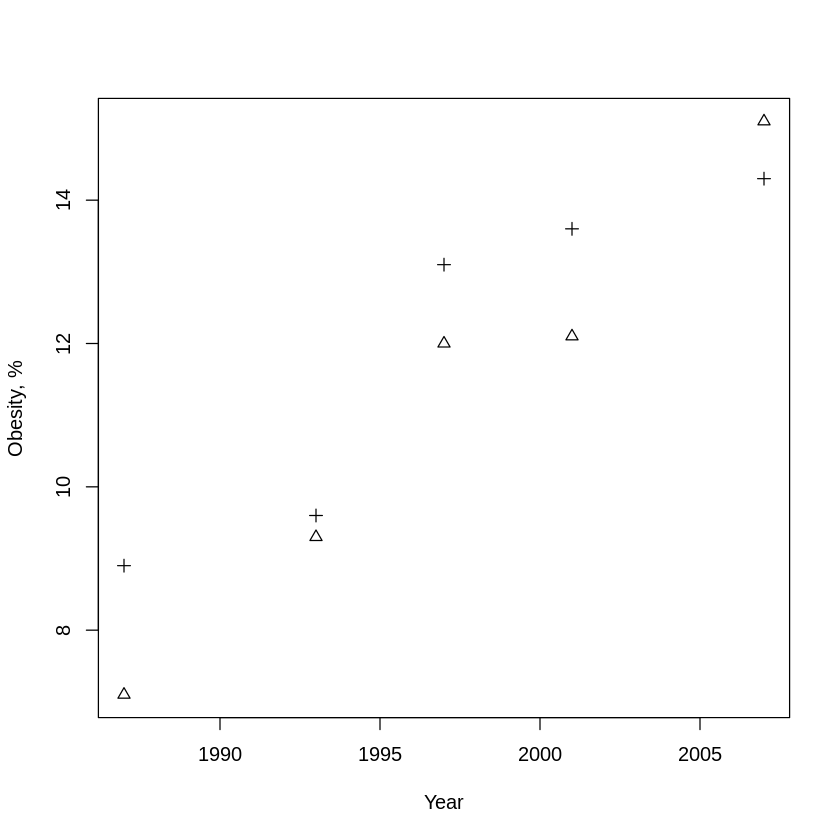

In [114]:
plot(year,y_M,xlab="Year",ylab="Obesity, %",pch=2)
points(year,y_W,xlab="Year",ylab="Obesity, %",pch=3)

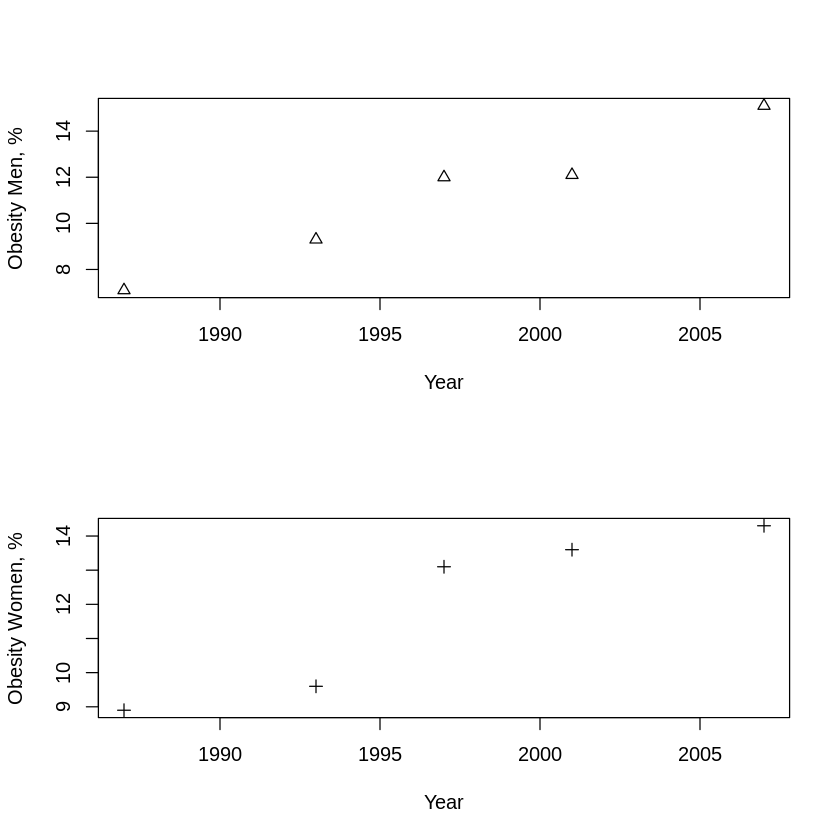

In [119]:
par(mfrow=c(2,1)) 
plot(year,y_M,xlab="Year",ylab="Obesity Men, %",pch=2)
plot(year,y_W,xlab="Year",ylab="Obesity Women, %",pch=3)
#Margenes exteriores
par(omi=c(0,0,0,0))
#Margenes interiores
par(mai=c(1.02,0.82,0.82,0.42))

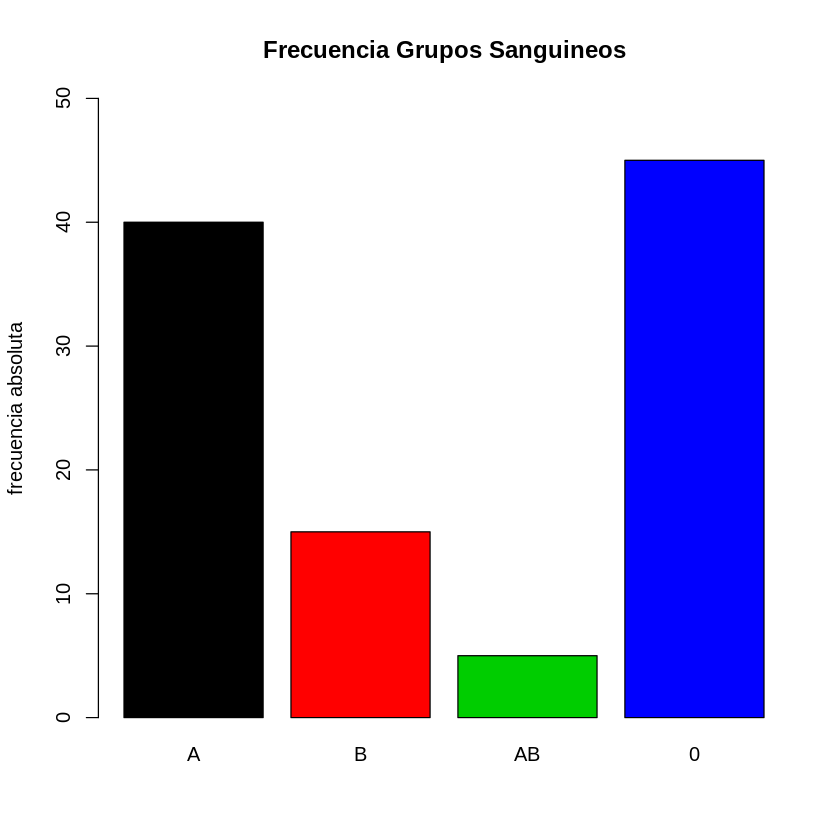

In [120]:
barplot(frecuencia_absoluta,
        names.arg=valores_variable,
        ylab="frecuencia absoluta",
        col=c(1,2,3,4),
        ylim=c(0,50),
        main="Frecuencia Grupos Sanguineos")

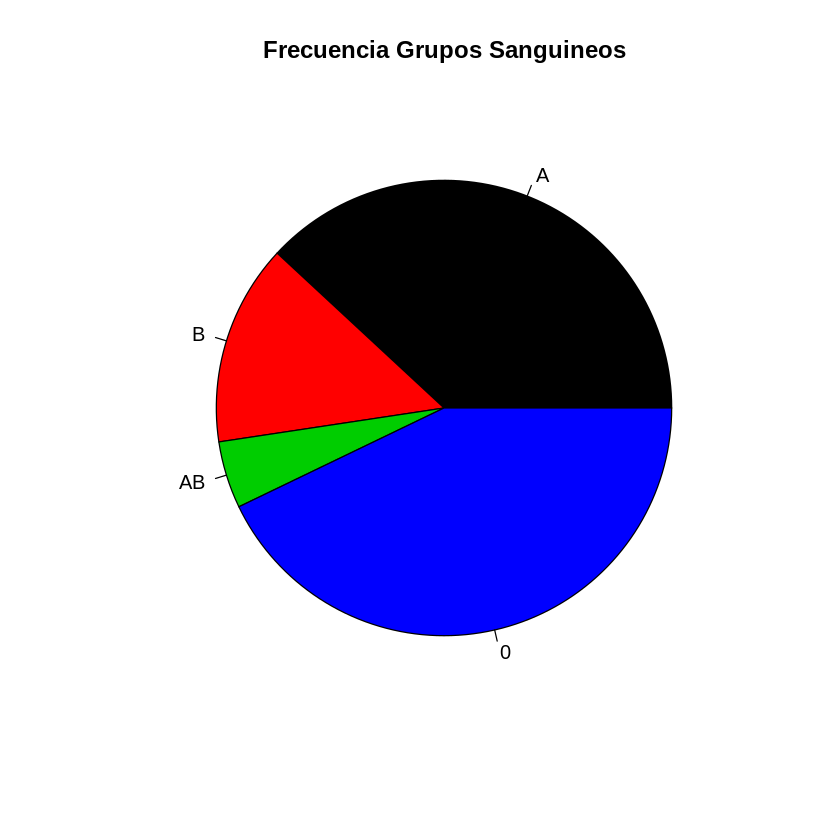

In [121]:
#Añadimos color y titulo

pie(frecuencia_absoluta,labels=valores_variable,col=c(1,2,3,4),main="Frecuencia Grupos Sanguineos")

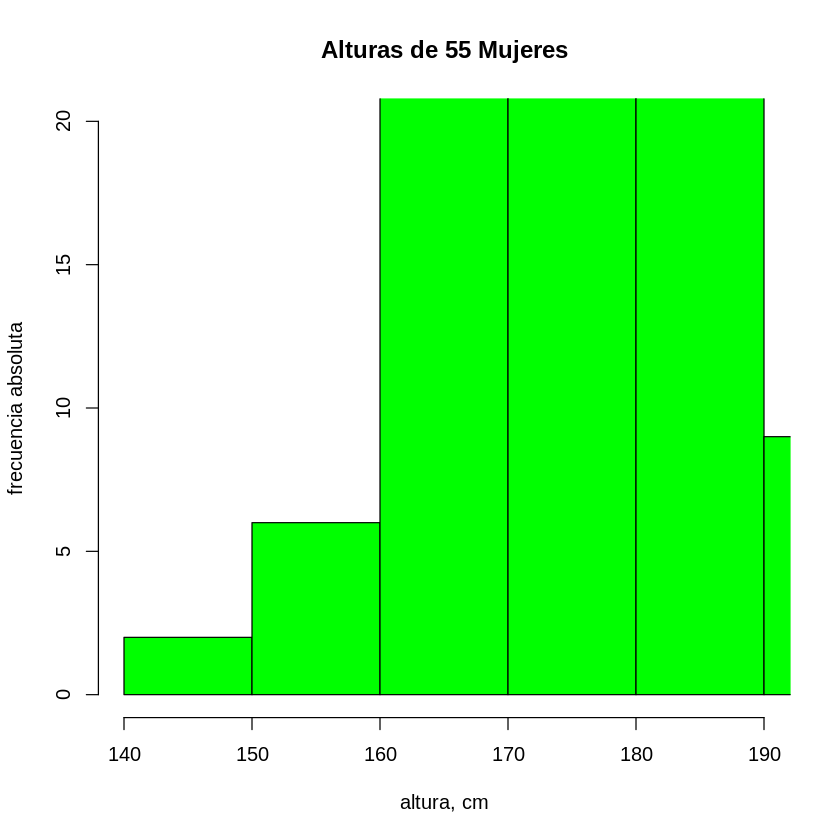

In [122]:
hist(datos_Altura,
     xlab="altura, cm",ylab="frecuencia absoluta",
     main="Alturas de 55 Mujeres",
     col="green",
     xlim=c(140,190),ylim=c(0,20)
    )

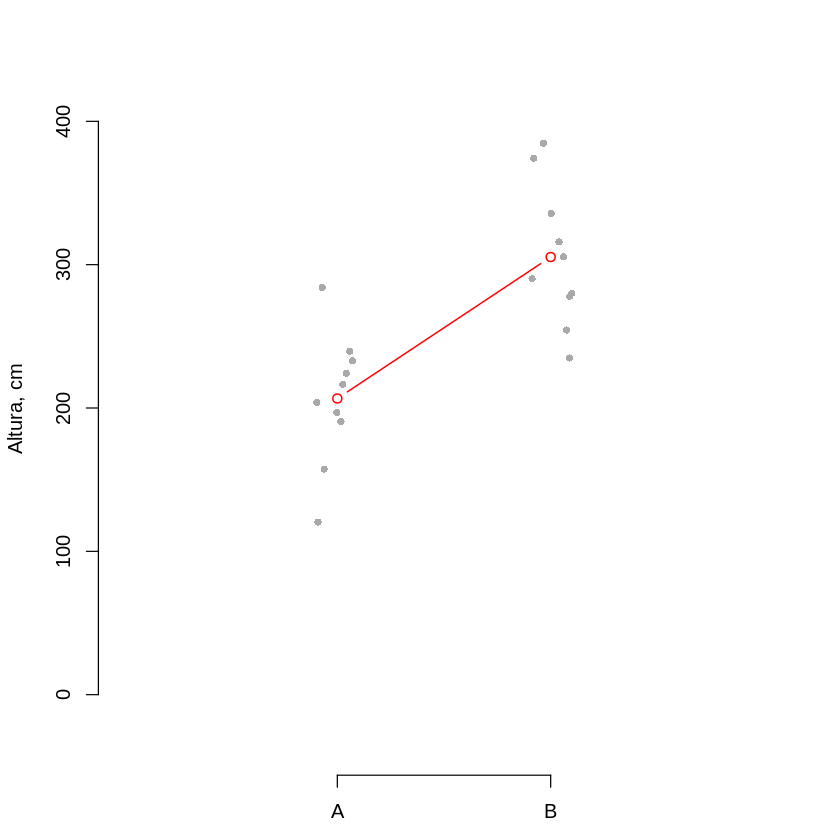

In [124]:
A<-c(120.43, 224.19, 203.90, 157.36, 216.45, 196.84, 232.99, 239.55, 190.58, 284.15)
B<-c(290.15, 254.39, 280.03, 277.90, 315.90, 234.90, 305.56, 374.15, 384.64, 335.67)

plot(1:2,
     c(mean(A),mean(B)),
     xlab="",ylab="Altura, cm",
     xlim=c(0,3),ylim=c(0,400), 
     xaxt='n',
     bty="n", 
     type='b',
     col="red",
     lwd=1.2)
stripchart(A,vertical=T, 
           method = 'jitter', jitter = 0.1, 
           cex = 0.8, pch = 16, 
           col = "darkgrey",add=T,at=1)
stripchart(B,vertical=T, 
           method = 'jitter', jitter = 0.1, 
           cex = 0.8,pch = 16, 
           col = "darkgrey",add=T,at=2)
axis(1, at=1:2, labels=c("A","B"),line=2.4)

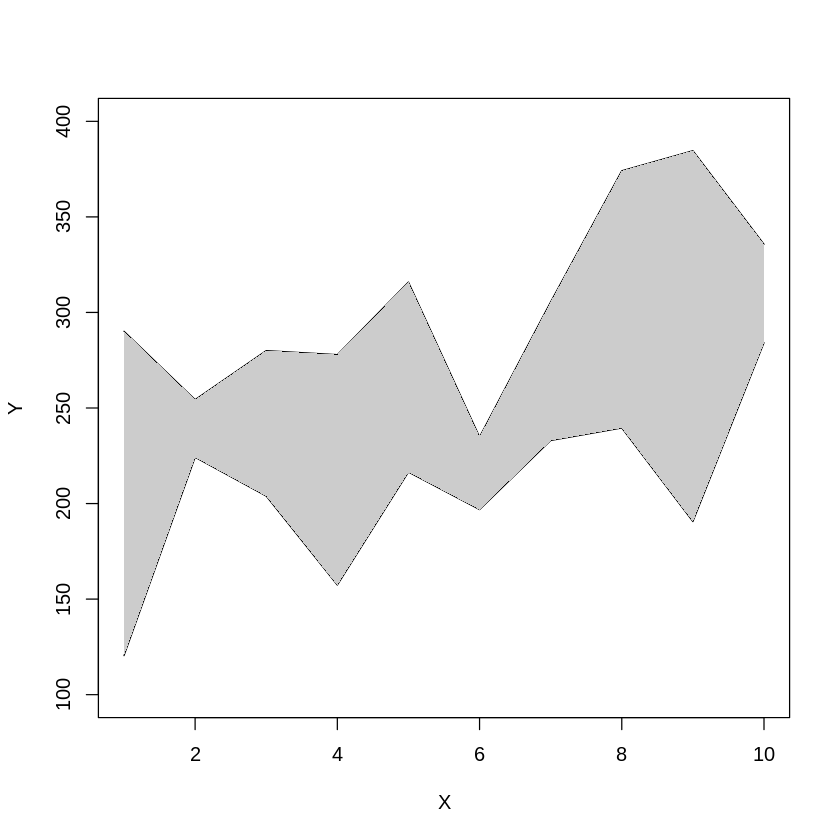

In [125]:
x <- 1:10
y.low <- c(120.43, 224.19, 203.90, 157.36, 216.45, 196.84, 232.99, 239.55, 190.58, 284.15)
y.high <- c(290.15, 254.39, 280.03, 277.90, 315.90, 234.90, 305.56, 374.15, 384.64, 335.67)

plot(x,y.high,type = 'n', ylim = c(100, 400), ylab = "Y", xlab = "X")
lines(x, y.low, col = "black")
lines(x, y.high, col = "black")

polygon(c(x, rev(x)), c(y.high, rev(y.low)), col = "grey80", border = NA)